In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [10]:
from pathlib import Path
from PIL import Image

for folder in ["../PetImages/train/Cat", "../PetImages/train/Dog",
               "../PetImages/test/Cat", "../PetImages/test/Dog"]:
    folder_path = Path(folder)
    for img_file in folder_path.iterdir():
        try:
            Image.open(img_file).verify()
        except (IOError, SyntaxError):
            print(f"Deleting corrupted file: {img_file}")
            img_file.unlink()  # deletes the file


In [3]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='../image-dataset/dogvscat/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

test_ds=keras.utils.image_dataset_from_directory(
    directory='../image-dataset/dogvscat/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 25000 files belonging to 1 classes.
Found 12500 files belonging to 1 classes.


In [4]:
#normalize

def process(image,label):
    image=tf.cast(image/255,tf.float32)
    return image,label
train_ds=train_ds.map(process)
test_ds=test_ds.map(process)

In [5]:
# model

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
history=model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
782/782 [==============================] - 195s 235ms/step - loss: 9.0573e-04 - accuracy: 0.9987 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
782/782 [==============================] - 117s 149ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
782/782 [==============================] - 114s 146ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
782/782 [==============================] - 119s 153ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
782/782 [==============================] - 119s 152ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
782/782 [==============================] - 120s 154ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
782/782 [==============================] - 120s 153ms/step - loss

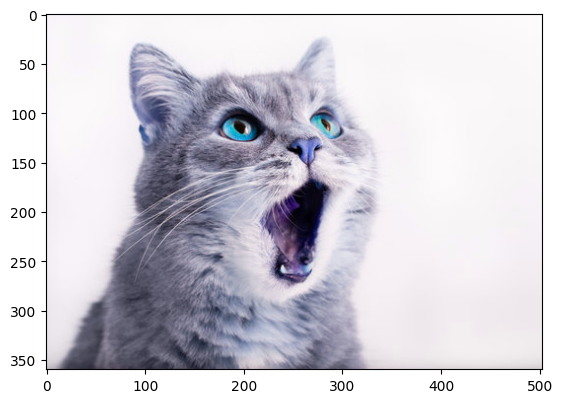

In [15]:
import cv2

test_img=cv2.imread('../image-dataset/train/cat.jpg')
plt.imshow(test_img)


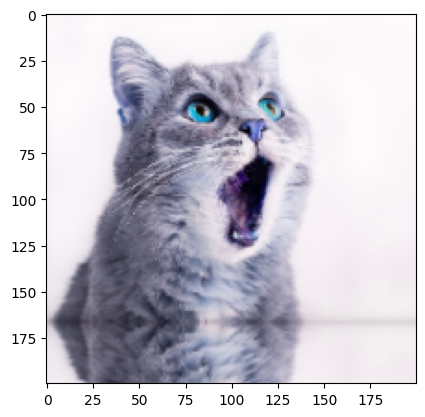

In [22]:
test_img2=cv2.imread('../image-dataset/train/aa.png')
plt.imshow(test_img2)

In [16]:
test_img=cv2.resize(test_img,(256,256))
test_in=test_img.reshape((1,256,256,3))
model.predict(test_in)

1/1 [==============================] - 1s 569ms/step


array([[0.]], dtype=float32)

In [23]:
test_img2=cv2.resize(test_img2,(256,256))
test_in2=test_img2.reshape((1,256,256,3))
model.predict(test_in2)

1/1 [==============================] - 0s 23ms/step


array([[0.]], dtype=float32)

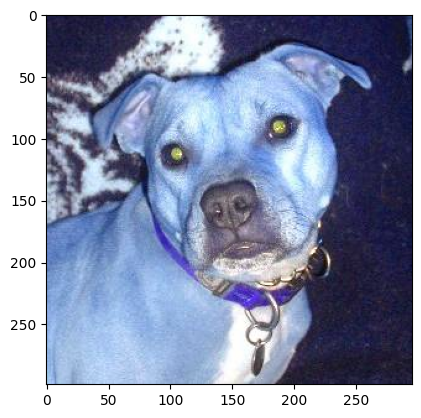

In [26]:
test_img2=cv2.imread('../image-dataset/dogvscat/test/test/2.jpg')
plt.imshow(test_img2)

In [27]:
test_img2=cv2.resize(test_img2,(256,256))
test_in2=test_img2.reshape((1,256,256,3))
model.predict(test_in2)

1/1 [==============================] - 0s 28ms/step


array([[0.]], dtype=float32)